# shAI Training 2023 | Level 1


## Task#10 (MNIST Project)

### Classification

- Before you start make sure you have latest Jupyter notebook version
- <font color= red> If you have older version fetching the data might be different  </font>  


In [1]:
import warnings
warnings.filterwarnings('ignore')

## Get the Dataset

In [2]:
import sklearn.datasets

In [3]:
# Load the MNIST dataset
mnist = sklearn.datasets.fetch_openml('mnist_784', version=1)

## Explore and Prepare the Dataset

#### Print the dataset to get an insight:


In [4]:
# Print dataset details
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

#### Split you data into data and labels (target)

In [5]:
# CODE HERE
X, y = mnist['data'], mnist['target']

#### find the data shape using .shape function

In [6]:
# CODE HERE
# Find the shape of the data
print(X.shape)

(70000, 784)


### Peek at one digit from the dataset

In [7]:
import matplotlib
import matplotlib.pyplot as plt

***NOTE: ALL THE COMMANDS FOR PLOTTING A FIGURE SHOULD ALL GO IN THE SAME CELL. SEPARATING THEM OUT INTO MULTIPLE CELLS MAY CAUSE NOTHING TO SHOW UP.***

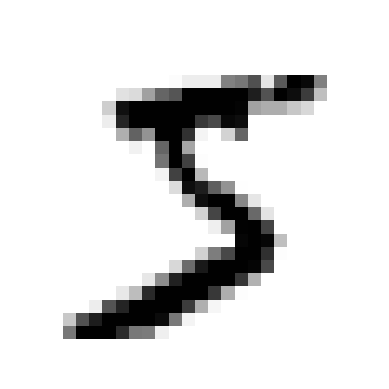

In [8]:
# CODE HERE
# Peek at one digit
some_digit = X.iloc[0]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

#### Split the data into train and test set

In [9]:
import numpy as np

In [10]:
# CODE HERE
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)

### Shuffling the training set

In [11]:
#hint shuffle-vs-permutation-numpy
# CODE HERE
# Shuffle the training set
shuffle_index = np.random.permutation(len(X_train))
X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

#### access the label of the above digit image

In [12]:
# CODE HERE
# Access the label
y.iloc[0]

'5'

### Training a <font color= red>Binary</font> classifier


#### Create the target vectors for this classification task
***NOTE : you can try different number.***

In [13]:
# CODE HERE
# If you got stuck use GOOGLE
# Binary classification for the number 5
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

### SGD classifier

#### Create a SGD classifier

In [14]:
from sklearn.linear_model import SGDClassifier

In [15]:
# CODE HERE
# Create an SGD classifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

#### use SGD classifier  to detect images of the number 5

In [16]:
# CODE HERE
sgd_clf.predict([some_digit])

array([ True])

## Performance measure

####  Measuring Accuracy Using <font color= blue>Cross-validation</font>

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
# CODE HERE

# Measure accuracy using cross-validation
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96525, 0.95915, 0.94675])

#### Try a dumb classifier

In [19]:
# CODE HERE
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

#### find cross_val_score for the dumb classifier

In [20]:
#CODE HERE
# Measure accuracy using cross-validation
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9119 , 0.91075, 0.90855])

## Confusion matrix

In [21]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

#### try to find confusion matrix

In [22]:
# CODE HERE
# Find confusion matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[53942,   682],
       [ 1895,  3481]])

####  try perfect classifier which will have only true positives and true negative


In [23]:
# CODE HERE

# Create a perfect classifier
class PerfectClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        return np.array(y_train_5)  # Returning the true labels as predictions

# Instantiate the perfect classifier
perfect_clf = PerfectClassifier()

# Predict using the perfect classifier (it simply returns the true labels)
y_train_pred_perfect = perfect_clf.predict(X_train)

# Compute the confusion matrix
conf_matrix_perfect = confusion_matrix(y_train_5, y_train_pred_perfect)
conf_matrix_perfect

array([[54624,     0],
       [    0,  5376]])

## Precision and Recall

In [24]:
from sklearn.metrics import precision_score, recall_score,f1_score

***Note that precision and recall score might be different from one to anothor***

#### find precision score

In [25]:
# CODE HERE
# Find precision score
precision_score(y_train_5, y_train_pred)


0.8361758347345665

#### find recall score

In [26]:
# CODE HERE
# Find recall score
recall_score(y_train_5, y_train_pred)

0.6475074404761905

#### find f1 score
***Notice that f1 score is harmonic mean between recall and precision***

In [27]:
# CODE HERE
# Find F1 score
f1_score(y_train_5, y_train_pred)

0.7298458957962051

# Precision/Recall Tradeof

#### try to use decision_function() and make prediction

In [28]:
# CODE HERE
y_scores = sgd_clf.decision_function([some_digit])
y_scores


array([5702.37912105])

#### Set the threshold to zero

In [29]:
# CODE HERE
# Set the threshold to zero
threshold_0 = 0
y_some_digit_pred = (y_scores > threshold_0)
y_some_digit_pred

array([ True])

#### Set the threshold to 200000

In [30]:
# CODE HERE
# Set the threshold to 200000
threshold_200000 = 200000
y_some_digit_pred = (y_scores > threshold_200000)
y_some_digit_pred

array([False])

#### To decide which threshold you want to use find decision scores for all instances

In [31]:
# CODE HERE
# Decision scores for all instances
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores

array([-10447.52710679, -17381.09148702, -25164.93674041, ...,
       -19141.09473313, -27202.07048986, -22046.4053871 ])

#### computing precision and recall for all possible thresholds using the precision_recall_curve()

In [32]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

#### plot precision and recall as functions of the threshold value using Matplotlib

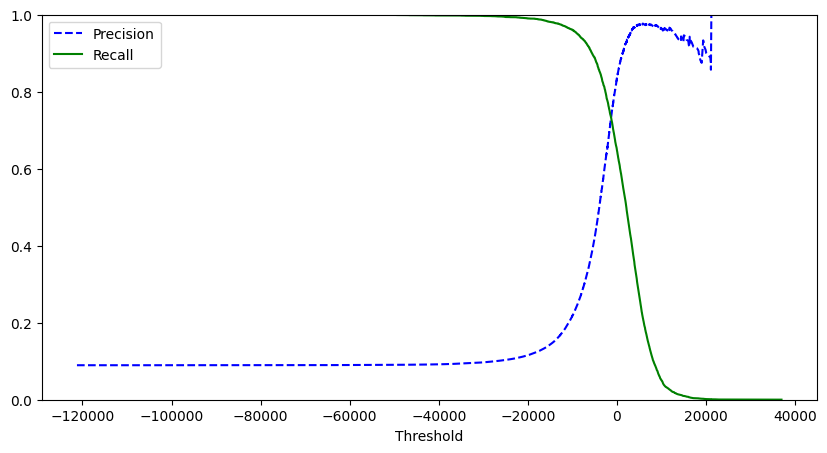

In [33]:
# CODE HERE
plt.figure(figsize=(10,5))

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.show()

#### lets aim for 90%recall
#### try different threshold and see what will happen

In [34]:
from sklearn.metrics import precision_recall_curve

# Assuming y_scores contains the decision scores for the training set
# y_train_5 contains the true labels for whether a digit is '5' or not

# Compute precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

# Find the threshold that gives us approximately 90% recall
desired_recall = 0.90
threshold_90_recall = thresholds[np.argmax(recalls >= desired_recall)]

# Make predictions with this threshold
y_train_pred_90_recall = (y_scores >= threshold_90_recall)

# Compute precision and recall with this new threshold
precision_90_recall = precision_score(y_train_5, y_train_pred_90_recall)
recall_90_recall = recall_score(y_train_5, y_train_pred_90_recall)

#### precision score

In [35]:
# CODE HERE
precision_90_recall

0.0896

#### recall score

In [36]:
#CODE HERE
recall_90_recall

1.0

# The ROC Curve

In [37]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

#### plot the FPR against the TPR using Matplotlib

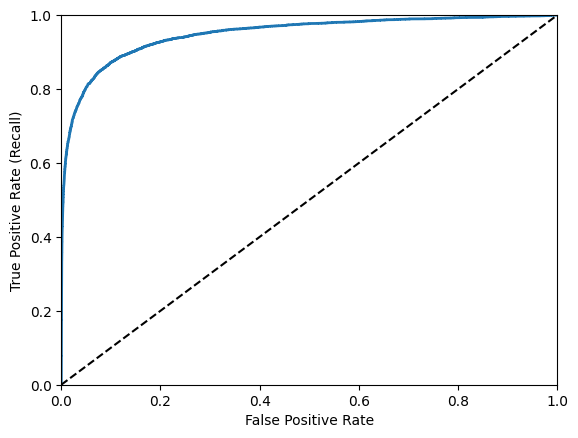

In [38]:
# CODE HERE
# Plot the FPR against the TPR using Matplotlib
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.show()

#### computing the ROC AUC score

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.949291872320426

# RandomForest Classifier
#### train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the SGDClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
# CODE HERE
# Train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the SGDClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

y_scores_forest = y_probas_forest[:, 1]  # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)


#### try to plot ROC
***Notice that you will need scores not probabilities***

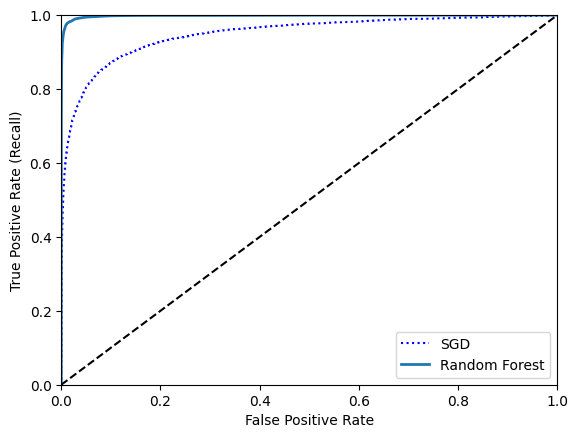

In [42]:
# CODE HERE
# if you got suck use GOOGLE
# Plot ROC curve
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc="lower right")
plt.show()

#### find ROC AUC score for randomforestclassifier

In [43]:
# CODE HERE
# Find ROC AUC score for RandomForestClassifier
roc_auc_score(y_train_5, y_scores_forest)

0.9984267088985611


# Congrats you did it 🥳 !
# #shAI_Club